<a href="https://colab.research.google.com/github/AndrewKruszka/NeuralMachineLearning/blob/main/RandomVariables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1(a) **Probability Distribution Examples**


In [161]:
import numpy as np
import scipy.stats as st
import scipy.signal as signal
import matplotlib.pyplot as plt

## **1. Bernoulli Distribution**

The Bernoulli distribution represents a binary outcome where an event occurs with probability p or does not occur with probability 1-p. This distribution is commonly used in scenarios like coin flips or yes/no decisions

**Probability Mass Function**

P(X = k) =
\begin{cases}
p, & \text{if } k = 1 \\
1 - p, & \text{if } k = 0
\end{cases}

Where:

**\( X \)** is a random variable with values 0 or 1\
**\( K \)** is the outcome of the random variable, which is either:
  - \(k=1\) (success) with probability \(p\)
  - \(k=0) (failure) with probability \(1-p\)

**\( p \)** is the probability that the event happens\
**\( 1-p \)** is the probability that the event does *not* happen

In [162]:
p = 0.3  # Probability of success
n_samples = 10000  # Number of samples

bernoulli_samples = np.random.binomial(1, p, n_samples) # Generate Bernoulli samples

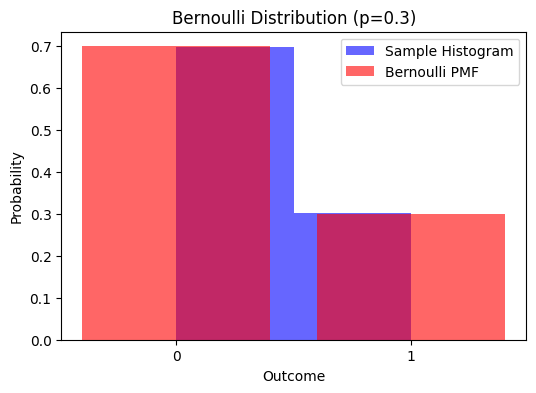

In [163]:
plt.figure(figsize=(6,4))
plt.hist(bernoulli_samples, bins=2, weights=np.ones_like(bernoulli_samples) / len(bernoulli_samples), alpha=0.6, color='b', label="Sample Histogram")

x = [0, 1]  # Possible outcomes (0 or 1)
pmf = [1-p, p]  # Corresponding probabilities
plt.bar(x, pmf, alpha=0.6, color='r', label="Bernoulli PMF")

plt.xlabel("Outcome")
plt.ylabel("Probability")
plt.title("Bernoulli Distribution (p=0.3)")
plt.xticks([0, 1])
plt.legend()
plt.show()

In the above chart, the purple bars represent the sample histogram, showing the relative frequency of 0 and 1 generated in the dataset

The red bars represent the theoretical PMF, showing the expected probability of each outcome based on the formula

## **Uniform Distribution**
The Uniform Distribution models a scenario where all values within a given range \([a, b])\ are equally likely.


**Probability Density Function**

f(x) =
\begin{cases}
\frac{1}{b - a}, & a \leq x \leq b \\
0, & \text{otherwise}
\end{cases}

Where:

**\( X \)** is a random variable that takes values between \(a\) and \(b\)\
**\(a\), \(b\)** are the the lower and upper bounds of the distribution\
**\( 1/b-a \)** is the height of the PDF, ensuring that the total probability integrates to 1\

In [164]:
a, b = 0, 10  # Lower and upper bounds
n_samples = 10000  # Number of samples

# Generate Uniform samples
uniform_samples = np.random.uniform(a, b, n_samples) # Generate Uniform samples

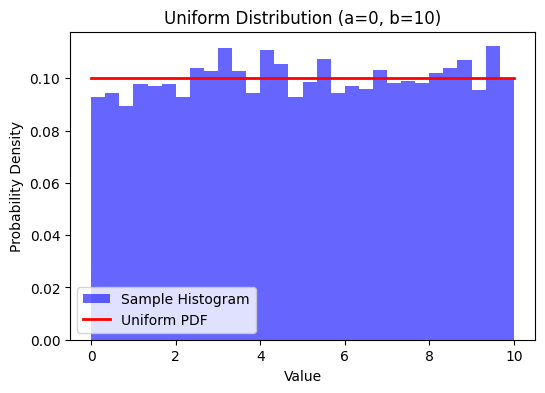

In [165]:
plt.figure(figsize=(6,4))
plt.hist(uniform_samples, bins=30, density=True, alpha=0.6, color='b', label="Sample Histogram")

x = np.linspace(a, b, 100)
pdf = np.ones_like(x) / (b - a)  # PDF is constant 1/(b-a)
plt.plot(x, pdf, 'r-', lw=2, label="Uniform PDF")

plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.title("Uniform Distribution (a=0, b=10)")
plt.legend()
plt.show()

In the chart above, the purple bars represent the sample histogram, showing the distribution of the sampled data

The red line represents the PDF of a Uniform Distribution, which is flat since each outcome has an equal probability

## **Poisson Distribution**
The Poisson Distribution models the number of times an event occurs in a fixed tome or space interval, given a known average rate

**Probability Mass Function**

\begin{equation}
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}, \quad k = 0, 1, 2, \dots
\end{equation}

Where:\
**\( X \)** is the number of occurrences of the event.\
**\( k \)** is a specific count of occurrences\

\begin{equation}
(\lambda)
\end{equation} is the average number of occurrences in the given time/space interval\
**\( e \)** is Euler’s number (≈ 2.718)\
**\( k! \)** is the factorial of \( k \), i.e., \( k! = k \times (k-1) \times \dots \times 1 \).\


In [166]:
lam = 5  # Mean number of occurrences (λ)
n_samples = 100000  # Number of samples

poisson_samples = np.random.poisson(lam, n_samples)# Generate Poisson samples

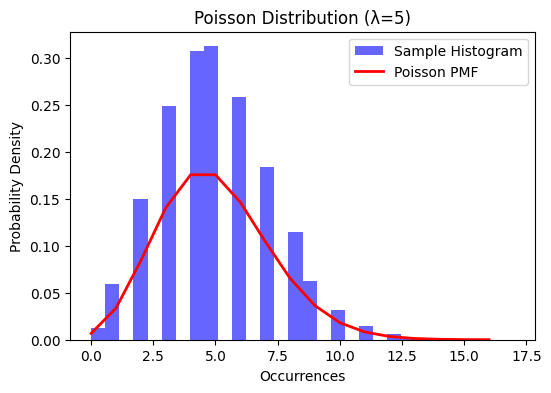

In [167]:
plt.figure(figsize=(6,4))
plt.hist(poisson_samples, bins=30, density=True, alpha=0.6, color='b', label="Sample Histogram")

x = np.arange(0, max(poisson_samples))  # Possible values of k
pmf = st.poisson.pmf(x, lam)  # Compute theoretical PMF
plt.plot(x, pmf, 'r-', lw=2, label="Poisson PMF")

plt.xlabel("Occurrences")
plt.ylabel("Probability Density")
plt.title("Poisson Distribution (λ=5)")
plt.legend()
plt.show()

In the histogram above, the purple bars represent the actual occurrances from the randomly generated samples

The red line represents the true PMF of a Poisson Distribution where lambda = 5

## **Gaussian Distribution**
The Gaussian Distribution is a continuous probability distribution that describes data that clusters around a mean with a given standard deviation

**Probability Density Function**

\begin{equation}
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
\end{equation}

Where:
**\( X \)**: A continuous random variable.

\begin{equation}
( \mu ) \end{equation} is the mean average, which determines the center of the distribution.

\begin{equation}
( \sigma ) \end{equation} is the standard deviation, which controls the spread of the distribution.

\begin{equation}
( \sigma^2 ) \end{equation} is the variance, which is the square of the standard deviation.

\begin{equation}
( e )\end{equation} is Euler’s number (≈ 2.718)

\begin{equation}
( \pi ) \end{equation} is Pi (≈ 3.1416)



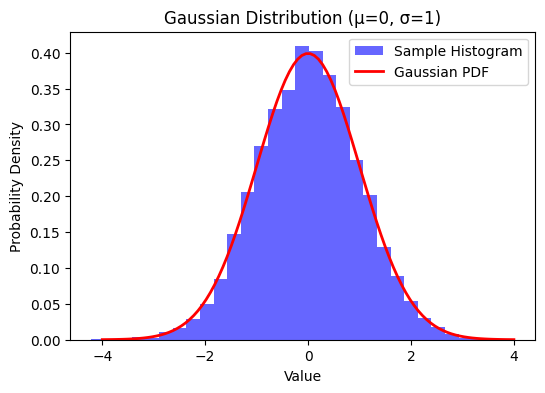

In [168]:
mu, sigma = 0, 1  # Mean (μ) and Standard Deviation (σ)
n_samples = 10000  # Number of samples

gaussian_samples = np.random.normal(mu, sigma, n_samples) # Generate Gaussian samples

plt.figure(figsize=(6,4))
plt.hist(gaussian_samples, bins=30, density=True, alpha=0.6, color='b', label="Sample Histogram")

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)  # Generate x values over ±4σ range
pdf = st.norm.pdf(x, mu, sigma)  # Compute theoretical PDF
plt.plot(x, pdf, 'r-', lw=2, label="Gaussian PDF")

plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.title("Gaussian Distribution (μ=0, σ=1)")
plt.legend()
plt.show()

In the chart above, the purple bars represent the generated samples from the Gaussian Distribution, with their heights showing the relative frequency of values within that range

The red line represents the true PDF of a Normal Distribution, this one is smooth because the Normal Distribution is continuous

## **Log-Normal Distribution**
The Log-Normal distribution describes a random variable whose logarithm follows a Normal Distribution. If a variable **X** is log-normally distributed, then:

\begin{equation}
Y = \log(X) \sim \mathcal{N}(\mu, \sigma^2)
\end{equation}

Where **Y** follows a normal distribution with mean (μ) and standard deviation (σ)


**Probability Density Function**

\begin{equation}
f(x) = \frac{1}{x\sigma\sqrt{2\pi}} e^{-\frac{(\log(x) - \mu)^2}{2\sigma^2}}, \quad x > 0
\end{equation}

Where:\
**\(X)** is a continuous random variable that follows a Log-Normal distribution.\
**\( Y = log(X) \)** is a normally distributed variable.\
**\( μ \)** is the **mean** of the underlying Normal distribution.\
**\( σ \)** is the **standard deviation** of the underlying Normal distribution.\
**\( e \)** is Euler’s number (≈ 2.718)\
**\( π \)**: Pi (≈ 3.1416)

In [169]:
mu, sigma = 0, 1  # Mean (μ) and Standard Deviation (σ) of the underlying normal distribution
n_samples = 10000  # Number of samples

lognormal_samples = np.random.lognormal(mu, sigma, n_samples) # Generate Log-Normal samples

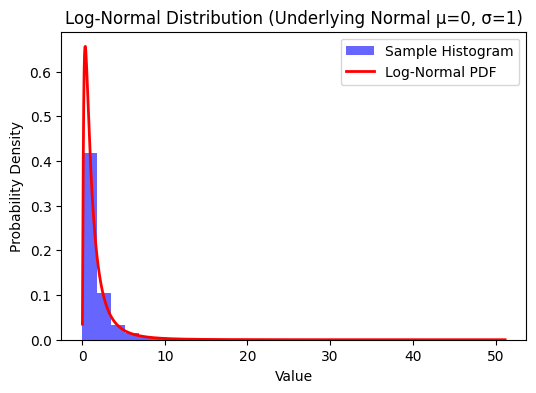

In [170]:
plt.figure(figsize=(6,4))
plt.hist(lognormal_samples, bins=30, density=True, alpha=0.6, color='b', label="Sample Histogram")

x = np.linspace(min(lognormal_samples), max(lognormal_samples), 1000)
pdf = st.lognorm.pdf(x, sigma, scale=np.exp(mu))  # Compute theoretical PDF
plt.plot(x, pdf, 'r-', lw=2, label="Log-Normal PDF")

plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.title("Log-Normal Distribution (Underlying Normal μ=0, σ=1)")
plt.legend()
plt.show()

In the chart above, the purple bars represent the generated samples from the Log-Normal Distribution, with their heigh showing the relative frequenct of values that fall within that range

The red line represents the true PDF, and is skewed to the right in Log-Normal Distributions